In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [2]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = cifar10.load_data()

170500096/170498071 [==============================] - 693s 4us/step


In [3]:
print('train:', len(x_train_image))
print('test:', len(x_test_image))

train: 50000
test: 10000


In [9]:
print(x_train_image.shape)
print(y_train_label.shape)

(50000, 32, 32, 3)
(50000, 1)


In [11]:
y_train_label[0]

array([6], dtype=uint8)

In [10]:
x_train_image[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [12]:
label_dict = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

In [49]:
import matplotlib.pyplot as plt
def plot_image_label_prediction(image,label,prediction,index,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25:
        num = 25
    for i in range(0, num):
        plots = plt.subplot(5, 5, 1+i)
        plots.imshow(image[index], cmap = "binary")
        title = str(i) + "," + label_dict[label[i][0]]
        if len(prediction) > 0:
            title = title + "=>" + label_dict[prediction[i]]
        plots.set_title(title, fontsize = 10)
        index +=1
    plt.show()

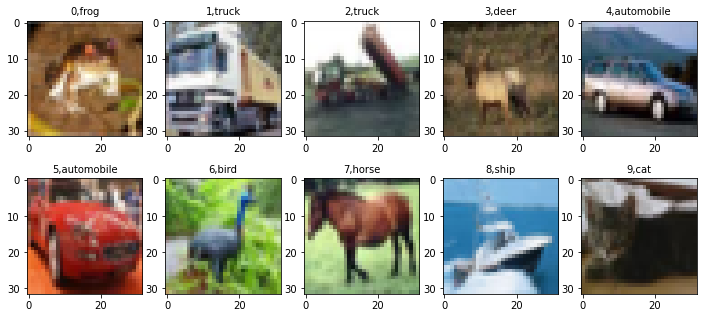

In [19]:
plot_image_label_prediction(x_train_image, y_train_label, [],0,10)

In [22]:
x_train_image[0][0][0]

array([59, 62, 63], dtype=uint8)

In [23]:
x_train_image.max()

255

In [24]:
x_train_norm = x_train_image.astype('float32')/255
x_test_norm = x_test_image.astype('float32')/255

In [25]:
x_train_norm[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

In [26]:
from keras.utils import np_utils

In [27]:
y_train_oh =  np_utils.to_categorical(y_train_label)
y_test_oh = np_utils.to_categorical(y_test_label)

In [28]:
y_train_oh

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
y_train_oh.shape

(50000, 10)

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Activation

In [33]:
model = Sequential()

In [36]:
model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (32,32,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))

In [38]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [39]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [40]:
train_history = model.fit(x_train_norm, y_train_oh, validation_split = 0.2, epochs = 10, batch_size = 128, verbose = 2)

Epoch 1/10
313/313 - 347s - loss: 1.4973 - accuracy: 0.4564 - val_loss: 1.1883 - val_accuracy: 0.5938
Epoch 2/10
313/313 - 361s - loss: 1.0525 - accuracy: 0.6258 - val_loss: 0.9373 - val_accuracy: 0.6785
Epoch 3/10
313/313 - 361s - loss: 0.8660 - accuracy: 0.6949 - val_loss: 0.8758 - val_accuracy: 0.6983
Epoch 4/10
313/313 - 362s - loss: 0.7524 - accuracy: 0.7349 - val_loss: 0.7709 - val_accuracy: 0.7401
Epoch 5/10
313/313 - 363s - loss: 0.6487 - accuracy: 0.7735 - val_loss: 0.7359 - val_accuracy: 0.7503
Epoch 6/10
313/313 - 365s - loss: 0.5451 - accuracy: 0.8101 - val_loss: 0.6977 - val_accuracy: 0.7574
Epoch 7/10
313/313 - 360s - loss: 0.4666 - accuracy: 0.8335 - val_loss: 0.7067 - val_accuracy: 0.7631
Epoch 8/10
313/313 - 359s - loss: 0.3918 - accuracy: 0.8636 - val_loss: 0.6941 - val_accuracy: 0.7653
Epoch 9/10
313/313 - 360s - loss: 0.3257 - accuracy: 0.8845 - val_loss: 0.7017 - val_accuracy: 0.7687
Epoch 10/10
313/313 - 360s - loss: 0.2759 - accuracy: 0.9036 - val_loss: 0.6941 - 

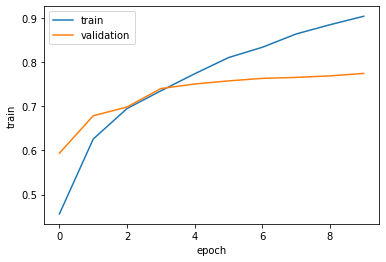

In [41]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.xlabel('epoch')
    plt.ylabel('train')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()
    
show_train_history(train_history, 'accuracy', 'val_accuracy')

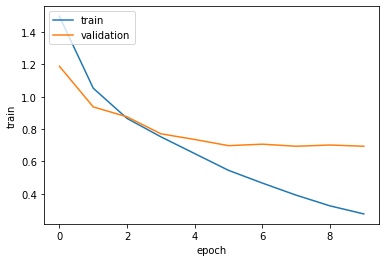

In [42]:
show_train_history(train_history, 'loss', 'val_loss')

In [43]:
scores = model.evaluate(x_test_norm, y_test_oh)
print("loss=" + str(scores[0]))
print("accuracy=" + str(scores[1]))

313/313 [==============================] - 36s 115ms/step - loss: 0.7176 - accuracy: 0.7695
loss=0.7176096439361572
accuracy=0.7695000171661377


In [46]:
prediction = model.predict_classes(x_test_norm)
print(prediction[:10])

[3 8 8 0 6 6 3 6 3 1]


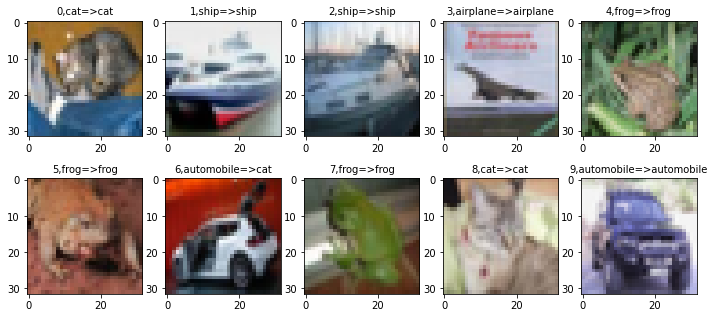

In [50]:
plot_image_label_prediction(x_test_image, y_test_label, prediction,0,10)

In [51]:
prediction.shape

(10000,)

In [52]:
y_test_label.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [53]:
import pandas as pd
pd.crosstab(y_test_label.reshape(-1), prediction, rownames = ['label'], colnames = ['prediction'])

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,774,10,50,20,17,5,11,11,72,30
1,13,852,3,8,4,1,5,6,33,75
2,59,4,613,58,109,49,41,41,20,6
3,24,5,46,588,78,138,44,47,18,12
4,10,2,30,50,820,18,17,44,7,2
5,13,2,34,154,59,646,15,60,8,9
6,4,3,31,66,41,29,806,9,7,4
7,16,1,17,25,58,27,4,843,2,7
8,29,19,10,6,8,3,3,7,901,14


In [54]:
Predicted_Probability = model.predict(x_test_norm)

In [59]:
def show_Predicted_Probability(y, prediction, x_image, Predicted_Probability, i):
    print('label:', label_dict[y[i][0]], 'predict:', label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_test_image[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j] + '_probability: ' + str(Predicted_Probability[i][j]*100) + '%')

label: cat predict: cat


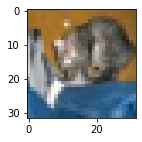

airplane_probability: 0.0004366130269772839%
automobile_probability: 0.014718073362018913%
bird_probability: 0.008023106056498364%
cat_probability: 87.16312646865845%
deer_probability: 0.002772135121631436%
dog_probability: 11.042683571577072%
frog_probability: 1.6441866755485535%
horse_probability: 0.07194260251708329%
ship_probability: 0.05181164597161114%
truck_probability: 0.00029553564218076644%


In [60]:
show_Predicted_Probability(y_test_label, prediction, x_test_image, Predicted_Probability, 0)

label: dog predict: horse


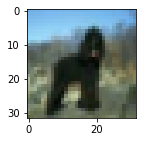

airplane_probability: 2.097700722515583%
automobile_probability: 0.07715411484241486%
bird_probability: 2.5684986263513565%
cat_probability: 0.1658824854530394%
deer_probability: 7.9741306602954865%
dog_probability: 2.607564814388752%
frog_probability: 0.08360136998817325%
horse_probability: 59.97467637062073%
ship_probability: 0.024708345881663263%
truck_probability: 24.42607879638672%


In [61]:
show_Predicted_Probability(y_test_label, prediction, x_test_image, Predicted_Probability, 85)

label: deer predict: deer


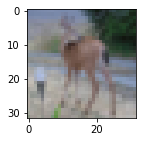

airplane_probability: 0.000915951568458695%
automobile_probability: 8.454947852953865e-07%
bird_probability: 1.3792038895189762%
cat_probability: 0.6824542302638292%
deer_probability: 54.46040630340576%
dog_probability: 6.934264302253723%
frog_probability: 0.04806986544281244%
horse_probability: 36.491888761520386%
ship_probability: 0.0020970199329894967%
truck_probability: 0.0007031342192931334%


In [62]:
show_Predicted_Probability(y_test_label, prediction, x_test_image, Predicted_Probability, 100)

label: dog predict: dog


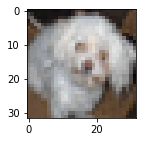

airplane_probability: 2.2268825716764695e-05%
automobile_probability: 1.4517497426425052e-06%
bird_probability: 0.045042476267553866%
cat_probability: 2.55045797675848%
deer_probability: 0.0009683626558398828%
dog_probability: 97.39620089530945%
frog_probability: 0.0011179330613231286%
horse_probability: 0.005008952575735748%
ship_probability: 0.00047241555876098573%
truck_probability: 0.0007073087999742711%


In [63]:
show_Predicted_Probability(y_test_label, prediction, x_test_image, Predicted_Probability, 1000)

label: horse predict: ship


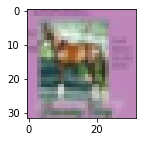

airplane_probability: 2.7316875755786896%
automobile_probability: 0.3977232612669468%
bird_probability: 0.2571863355115056%
cat_probability: 2.7963364496827126%
deer_probability: 4.682505503296852%
dog_probability: 2.5937967002391815%
frog_probability: 0.8871368132531643%
horse_probability: 13.361728191375732%
ship_probability: 52.76218056678772%
truck_probability: 19.52972412109375%


In [65]:
show_Predicted_Probability(y_test_label, prediction, x_test_image, Predicted_Probability, 6500)